<a href="https://colab.research.google.com/github/sudhang/css-nlp/blob/master/eda/NYT_Dataset_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
GDRIVEPATH = "/content/drive/MyDrive/TU/Sem 4/NLP"

In [ ]:
import pandas as pd

## Get the Datasets

## New York Times Front Page
[10,700 articles from the front page of the Times](https://components.one/datasets/above-the-fold)

In [ ]:
# Load the datasets
df_nyt = pd.read_csv(f"{GDRIVEPATH}/nytimes_front_page.csv")

In [ ]:
df_nyt.columns

Index(['Unnamed: 0', 'id', 'title', 'author', 'content', 'date', 'year',
       'month', 'front_page', 'url', 'date_counter', 'stems'],
      dtype='object')

We only need a few of these columns

In [ ]:
df_nyt = df_nyt[['title', 'author', 'content', 'date', 'front_page', 'url']]
df_nyt

,title,author,content,date,front_page,url
0,"How the Russia Inquiry Began: A Campaign Aide,...",Sharon LaFraniere,WASHINGTON — During a night of heavy drinking ...,2017-12-30,True,https://www.nytimes.com/2017/12/30/us/politics...
1,"For Trump, a Year of Reinventing the Presidenc...",Peter Baker,WASHINGTON — When President Trump meets with a...,2017-12-31,True,https://www.nytimes.com/2017/12/31/us/politics...
2,The U.S. Has Pummeled Al Qaeda in Yemen. But t...,Eric Schmitt,"MANAMA, Bahrain — The United States has triple...",2017-12-30,True,https://www.nytimes.com/2017/12/30/world/middl...
3,Why an Upstate Prisoner With a History of Esca...,William K. Rashbaum,The plan sounds ingenious. Remove two small se...,2017-12-30,True,https://www.nytimes.com/2017/12/30/nyregion/da...
4,"In Fire-Scarred Bronx Neighborhood, a World of...",Rick Rojas,"Even on a nose-numbingly cold morning, familie...",2017-12-30,True,https://www.nytimes.com/2017/12/30/nyregion/br...
...,...,...,...,...,...,...
10727,Bill Cosby Charged in Sexual Assault Case - Th...,Sydney Ember,"Bill Cosby, who has for decades been pursued b...",2015-12-30,False,http://www.nytimes.com/2015/12/31/business/med...
10728,"Bill Cosby, in Deposition, Said Drugs and Fame...",Graham Bowley,Read updates of Day 11 of the Bill Cosby trial...,2015-07-18,False,http://www.nytimes.com/2015/07/19/arts/bill-co...
10729,Cellphone Contacts in Paris Attacks Suggest Fo...,Alissa J. Rubin,PARIS — The terrorists who killed 130 people i...,2015-12-30,False,http://www.nytimes.com/2015/12/31/world/europe...
10730,Muslims on Twitter Say They Have Better Things...,Jeffrey Marcus,A plea by the leader of the Islamic State terr...,2015-12-30,False,http://www.nytimes.com/2015/12/31/world/middle...


In [ ]:
df_nyt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10732 entries, 0 to 10731
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   title       10732 non-null  object
 1   author      10732 non-null  object
 2   content     10732 non-null  object
 3   date        10732 non-null  object
 4   front_page  10732 non-null  bool  
 5   url         10732 non-null  object
dtypes: bool(1), object(5)
memory usage: 429.8+ KB


## Descriptive Statistics

In [ ]:
df_nyt.describe(include='all')

,title,author,content,date,front_page,url
count,10732,10732,10732,10732,10732,10732
unique,9025,792,9026,1213,2,10525
top,"How the Russia Inquiry Began: A Campaign Aide,...",Peter Baker,WASHINGTON — During a night of heavy drinking ...,2016-04-15,True,https://www.nytimes.com/2018/04/23/world/europ...
freq,2,300,2,29,5366,2


## Number of Articles per Author

<Axes: >

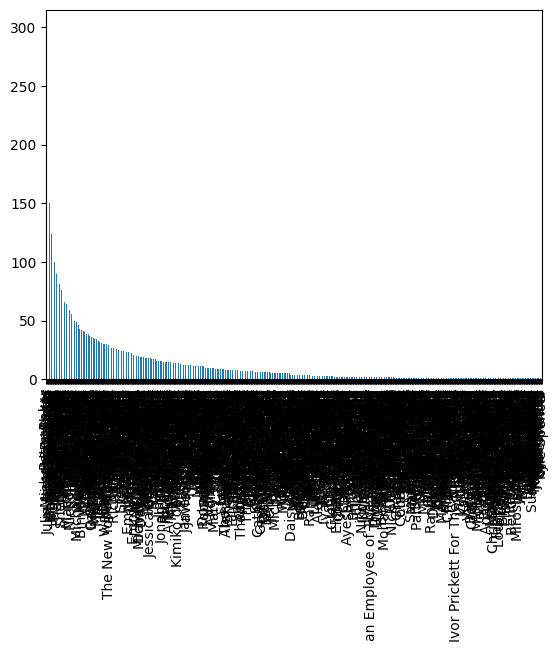

In [ ]:
df_nyt['author'].value_counts().plot(kind='bar')


## Number of Front Page Articles

<Axes: ylabel='front_page'>

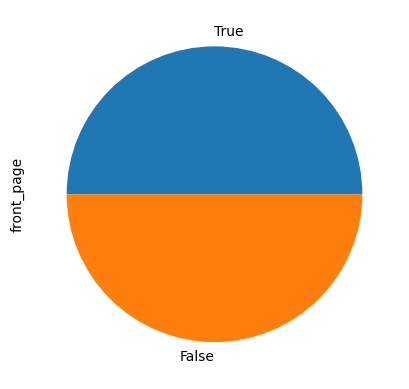

In [ ]:
df_nyt['front_page'].value_counts().plot(kind='pie')


<Axes: >

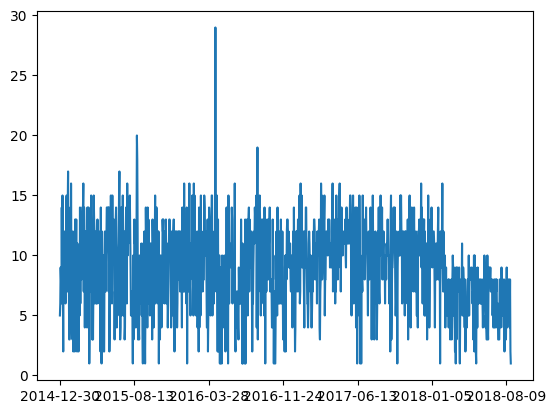

In [ ]:
df_nyt['date'].value_counts().sort_index().plot()


## Boilerplate?

In [ ]:
import re

# List of boilerplate regex patterns
boilerplate_patterns = [
    r"A version of this article appears in print on.*",
    r"Order Reprints \| Today’s Paper \| Subscribe",
    r"Follow us @nytimesbusiness on twitter.*",
    r"© Copyright.*",
    r"You must verify your age first.*",
    r"You need javascript enabled to view this page properly.*",
    # Add more patterns as needed
]

# Search for boilerplate text
for pattern in boilerplate_patterns:
    matches = df_nyt['content'].str.contains(pattern, regex=True)
    print(f"Pattern: {pattern}")
    print(f"Number of matches: {matches.sum()}")



Pattern: A version of this article appears in print on.*
Number of matches: 0
Pattern: Order Reprints \| Today’s Paper \| Subscribe
Number of matches: 0
Pattern: Follow us @nytimesbusiness on twitter.*
Number of matches: 0
Pattern: © Copyright.*
Number of matches: 0
Pattern: You must verify your age first.*
Number of matches: 0
Pattern: You need javascript enabled to view this page properly.*
Number of matches: 0


## Split into Train/Test

In [ ]:
from sklearn.model_selection import train_test_split

# Split the DataFrame into training and test sets
df_train, df_test = train_test_split(df_nyt, test_size=0.2, random_state=42)

# Save the training and test sets to CSV files
df_train.to_csv(f'{GDRIVEPATH}/data/nyt_train.csv', index=False)
df_test.to_csv(f'{GDRIVEPATH}/data/nyt_test.csv', index=False)
